In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pokemon_data = pd.read_csv('Pokemon.csv')

In [3]:
pokemon_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
pokemon_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [5]:
pokemon_data.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<h1>Questions we would like to answer:</h1>  
i) Strongest pokemon by type<br>  
ii) Correlation between stats and legendary status if any<br>
iii) What would make a great pokemon team for gym battles? <br>
iv) Do newer generation pokemon tend to be stronger than older ones? Let's deep-dive <br>
by types.<br>
v) Do types specialize in certain stats? <br>
vi) Are there more than one pokemon having the same name?  <br>
vii) Correlation between types and stats <br>

In [6]:
# There are no duplicate pokemons
pokemon_data['Name'].value_counts().sort_values(ascending = False)

Joltik        1
Blitzle       1
Exeggutor     1
Kakuna        1
Claydol       1
             ..
Hippopotas    1
Noctowl       1
Weavile       1
Kyurem        1
Probopass     1
Name: Name, Length: 800, dtype: int64

<p><b> Let's do some analysis of the quantitative variables </b></p>

(array([ 30.,  97., 183., 168., 144., 108.,  50.,  11.,   8.,   1.]),
 array([  5. ,  22.5,  40. ,  57.5,  75. ,  92.5, 110. , 127.5, 145. ,
        162.5, 180. ]),
 <a list of 10 Patch objects>)

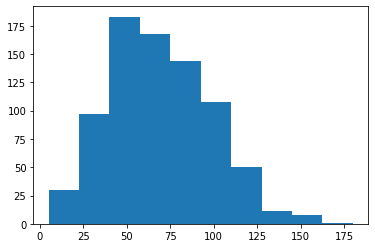

In [7]:
plt.hist(pokemon_data['Speed'])

(array([ 16.,  71., 173., 161., 166., 101.,  65.,  29.,  13.,   5.]),
 array([  5. ,  23.5,  42. ,  60.5,  79. ,  97.5, 116. , 134.5, 153. ,
        171.5, 190. ]),
 <a list of 10 Patch objects>)

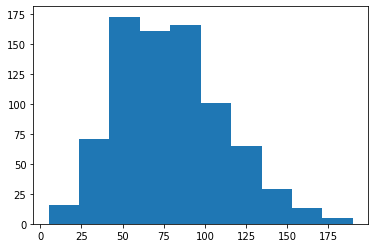

In [8]:
plt.hist(pokemon_data['Attack'])

(array([ 14., 149., 283., 170., 111.,  45.,  18.,   5.,   2.,   3.]),
 array([  5. ,  27.5,  50. ,  72.5,  95. , 117.5, 140. , 162.5, 185. ,
        207.5, 230. ]),
 <a list of 10 Patch objects>)

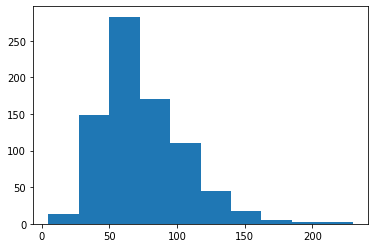

In [9]:
plt.hist(pokemon_data['Defense'])

(array([ 31., 162., 218., 121., 123.,  75.,  38.,  19.,   9.,   4.]),
 array([ 10. ,  28.4,  46.8,  65.2,  83.6, 102. , 120.4, 138.8, 157.2,
        175.6, 194. ]),
 <a list of 10 Patch objects>)

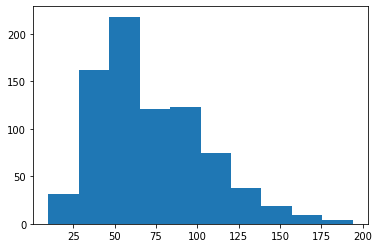

In [10]:
plt.hist(pokemon_data['Sp. Atk'])

(array([ 97., 230., 223., 148.,  67.,  21.,  12.,   0.,   1.,   1.]),
 array([ 20.,  41.,  62.,  83., 104., 125., 146., 167., 188., 209., 230.]),
 <a list of 10 Patch objects>)

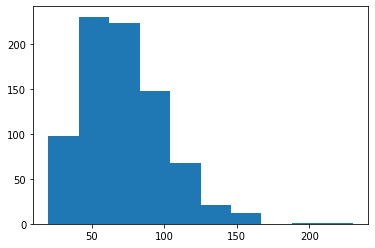

In [11]:
plt.hist(pokemon_data['Sp. Def'])

<blockquote> It seems that most of the numeric measures are right-skewed which makes sense since there will be some pokemon which are much more stronger than the others. </blockquote>

In [12]:
# Let's plot a scatter matrix but before that we need to convert boolean values to categoricals/numeric values
pokemon_data['Legendary'] = pokemon_data['Legendary'].map({True:1, False:0})


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012991595088>,
      dtype=object)

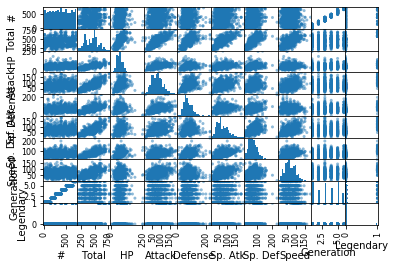

In [13]:
pd.plotting.scatter_matrix(pokemon_data, hist_kwds={'bins':20})

In [15]:
pokemon_data.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.119813,0.097614,0.102298,0.094786,0.088759,0.085817,0.010733,0.982516,0.153396
Total,0.119813,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.097614,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.102298,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.094786,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.088759,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.085817,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.010733,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.982516,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.153396,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


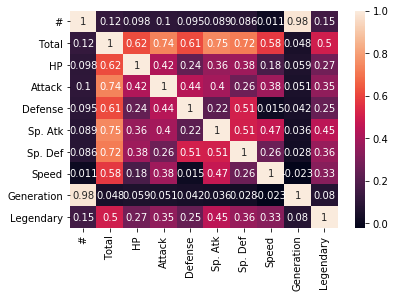

In [16]:
# Let's plot a correlation matrix
sns.heatmap(pokemon_data.corr(), annot = True)

We see total being correlated with attack, defense, sp.atk, sp.def etc. which makes sense since total power of a pokemon will be affected by these attributes. Also, we are not able to conclude that legendary pokemon have any correlation with stats from the above. 

There is a 50% correlation of a pokemon being legendary with their total power but is not enough to accept or reject the null hypothesis that legendary pokemon and non-legendary pokemon differ in stats.

<h4> Let's see now whether newer generation pokemon tend to be stronger than old ones </h4>

In [17]:
# We have 6 types for generations
pokemon_data['Generation'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

Text(0.5, 0, 'Pokemon strength')

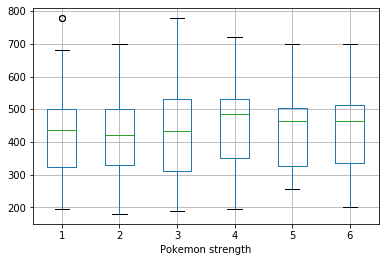

In [42]:
pokemon_data.boxplot(column = ['Total'], by = 'Generation')
plt.title('')
plt.suptitle('')
plt.xlabel('Pokemon strength')

From the above plot, we don't see a clear trend of increasing power with increasing generation. However we can see that generation 3 pokemon shows a lot of variability in terms of their strength. Also generation 3 and generation 4 pokemon seem to be stronger than the other generations.

<h4> Let's now check whether certain types specialize in any particular stats </h4>

In [71]:
# Let's first check the unique types for type 1 of a pokemon
pokemon_data['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [83]:
# Defining a boxplot function to follow DRY principle
def generate_boxplot(dataframe, yval, xval):
    dataframe.boxplot([yval], by = xval)
    plt.suptitle('')
    plt.figsize = (40, 10)
    plt.xticks(fontsize = 9, fontname = 'Comic Sans MS')
    plt.tick_params(axis ='x', rotation = 45) 

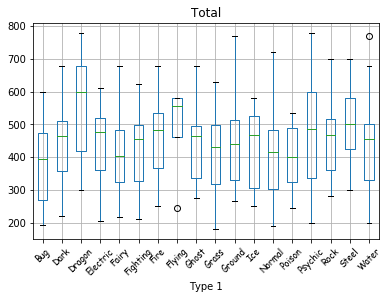

In [84]:
generate_boxplot(pokemon_data, 'Total', 'Type 1')

It seems that dragon types are usually the strongest pokemon types. Let's check for the same using Type 2.


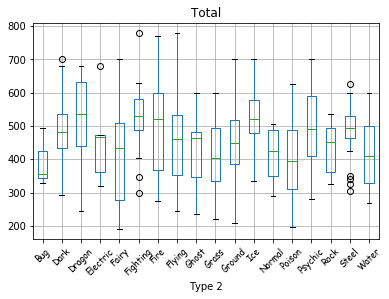

In [86]:
generate_boxplot(pokemon_data, 'Total', 'Type 2')

It seems irrespective of Type 1 or Type 2 , dragon types can be the strongest pokemons.